In [1]:
from __future__ import print_function

%matplotlib inline


import numpy as np
import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import os
import os.path as osp
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import pysptools.classification as cls
from spectral import *

import pysptools.material_count as cnt
import pysptools.spectro as spectro
import scipy
import scipy.io

# EE Algorithms \& Abundance Map \& Load RSVD dataset

In [2]:
def get_endmembers_NFINDR(data):
    print('Endmembers extraction with NFINDR')
    nfindr = eea.NFINDR()
    U = nfindr.extract(data, 7, maxit=10, normalize=True, ATGP_init=True)
    # 7 is the EM we want to find

    nfindr.display() # suffix='Forest-Original')
    # return an array of endmembers
    return U
def get_endmembers_ATGP(data):
    print('Endmembers extraction with ATGP')
    atgp = eea.ATGP()
    U = atgp.extract(data, 7, normalize=True)
    # 7 is the EM we want to find

    atgp.display() # display(suffix='Forest-Original')
    # return an array of endmembers
    return U
def get_endmembers_FIPPI(data):
    print('Endmembers extraction with FIPPI')
    fippi = eea.FIPPI()
    U = fippi.extract(data, 7, normalize=True)
    # 7 is the EM we want to find

    fippi.display() # (suffix='Forest-Original')
    # return an array of endmembers
    return U
def gen_abundance_maps(data, U):
    print('Abundance maps generation with NNLS')
    nnls = amp.NNLS()
    amaps = nnls.map(data, U, normalize=True)
    nnls.display(colorMap='jet', columns=7) #, suffix='Forest Abundance Map using NFINDR Result')
    # return a cube of abundance maps
    return amaps

In [3]:
rsvd_den = scipy.io.loadmat('rsvd_den.mat')
rsvd_den = rsvd_den['rsvd_den']

# Endmembers from rSVD denoised dataset

Endmembers extraction with ATGP


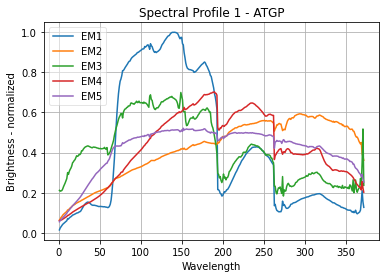

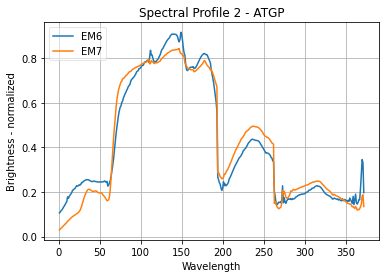

Abundance maps generation with NNLS


/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


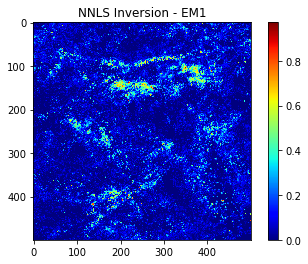

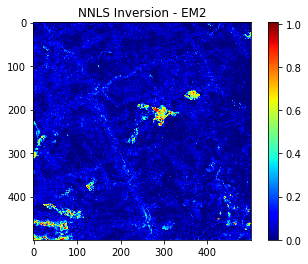

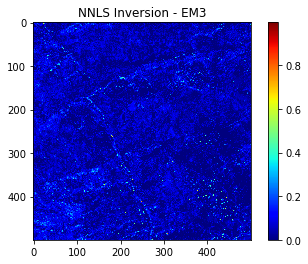

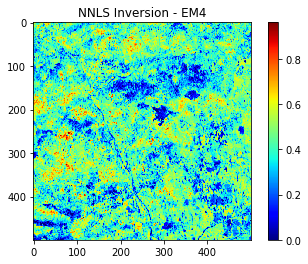

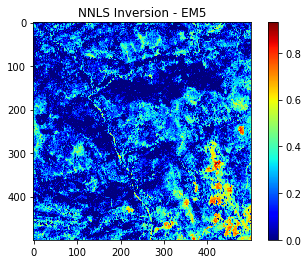

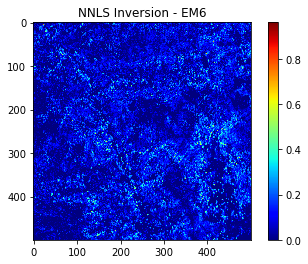

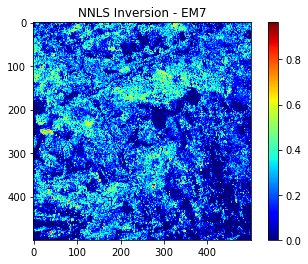

<Figure size 432x288 with 0 Axes>

In [5]:
# ATGP
rsvd_atgp = get_endmembers_ATGP(rsvd_den)
rsvda_am = gen_abundance_maps(rsvd_den, rsvd_atgp)
rsvd_atgp = {"rsvd_atgp": rsvd_atgp}
scipy.io.savemat("rsvd_atgp.mat", rsvd_atgp)

Endmembers extraction with NFINDR


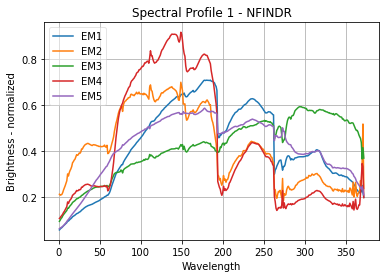

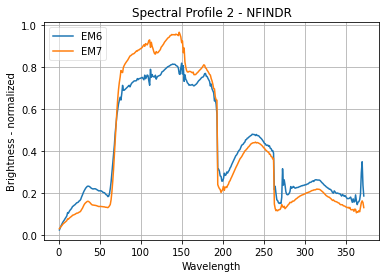

Abundance maps generation with NNLS


/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


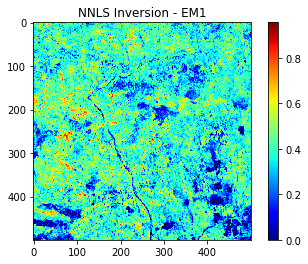

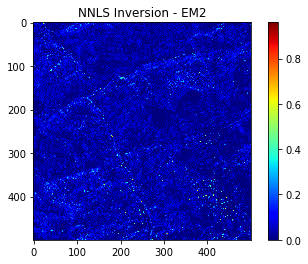

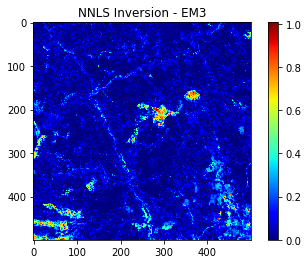

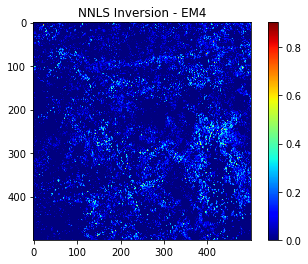

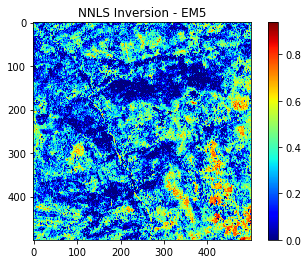

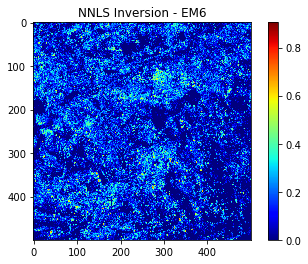

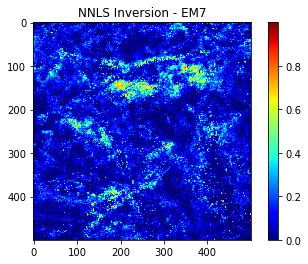

<Figure size 432x288 with 0 Axes>

In [6]:
# N-Finder
rsvd_nfindr = get_endmembers_NFINDR(rsvd_den)
pdn_am = gen_abundance_maps(rsvd_den, rsvd_nfindr)
rsvd_nfindr = {"rsvd_nfindr": rsvd_nfindr}
scipy.io.savemat("rsvd_nfindr.mat", rsvd_nfindr)

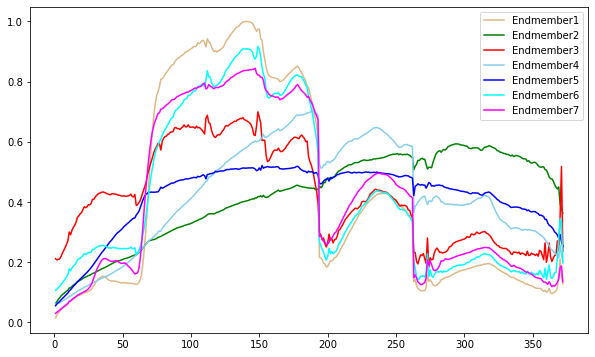

In [7]:
rsvd_atgp = scipy.io.loadmat('rsvd_atgp.mat')
rsvd_atgp = rsvd_atgp['rsvd_atgp']

plt.figure(figsize=(10,6))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
# plt.title('Spectral profiles')
plt.plot(range(1,373), rsvd_atgp[0,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), rsvd_atgp[1,:], color='green', label='Endmember2')
plt.plot(range(1,373), rsvd_atgp[2,:], color='red', label='Endmember3')
plt.plot(range(1,373), rsvd_atgp[3,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), rsvd_atgp[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), rsvd_atgp[5,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), rsvd_atgp[6,:], color='magenta', label='Endmember7')


plt.legend() # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()

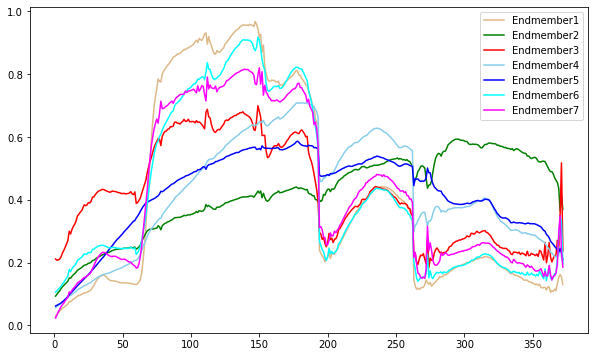

In [8]:
rsvd_nfindr = scipy.io.loadmat('rsvd_nfindr.mat')
rsvd_nfindr = rsvd_nfindr['rsvd_nfindr']

plt.figure(figsize=(10,6))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
# plt.title('Spectral profiles')
plt.plot(range(1,373), rsvd_nfindr[6,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), rsvd_nfindr[2,:], color='green', label='Endmember2')
plt.plot(range(1,373), rsvd_nfindr[1,:], color='red', label='Endmember3')
plt.plot(range(1,373), rsvd_nfindr[0,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), rsvd_nfindr[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), rsvd_nfindr[3,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), rsvd_nfindr[5,:], color='magenta', label='Endmember7')


plt.legend() # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()

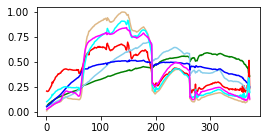

In [9]:
rsvd_atgp = scipy.io.loadmat('rsvd_atgp.mat')
rsvd_atgp = rsvd_atgp['rsvd_atgp']

plt.figure(figsize=(4,2))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
# plt.title('Spectral profiles')
plt.plot(range(1,373), rsvd_atgp[0,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), rsvd_atgp[1,:], color='green', label='Endmember2')
plt.plot(range(1,373), rsvd_atgp[2,:], color='red', label='Endmember3')
plt.plot(range(1,373), rsvd_atgp[3,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), rsvd_atgp[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), rsvd_atgp[5,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), rsvd_atgp[6,:], color='magenta', label='Endmember7')


#plt.legend() # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()

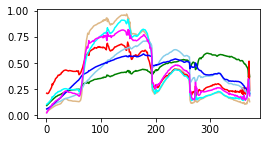

In [10]:
rsvd_nfindr = scipy.io.loadmat('rsvd_nfindr.mat')
rsvd_nfindr = rsvd_nfindr['rsvd_nfindr']

plt.figure(figsize=(4,2))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
# plt.title('Spectral profiles')
plt.plot(range(1,373), rsvd_nfindr[6,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), rsvd_nfindr[2,:], color='green', label='Endmember2')
plt.plot(range(1,373), rsvd_nfindr[1,:], color='red', label='Endmember3')
plt.plot(range(1,373), rsvd_nfindr[0,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), rsvd_nfindr[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), rsvd_nfindr[3,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), rsvd_nfindr[5,:], color='magenta', label='Endmember7')


#plt.legend() # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()